#FCN(Fully Connected Network)

##Builted model_1

###Load dataset & Split

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
tf.random.set_seed(42)

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)
x_train.max()

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


255

In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
x_train,x_test=x_train.reshape(-1,28*28),x_test.reshape(-1,28*28)

In [ ]:
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

x_train.shape: (60000, 784)
y_train.shape: (60000,)


In [ ]:
y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)


In [ ]:
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

y_train.shape: (60000, 10)
y_test.shape: (10000, 10)


###Create model_1

In [ ]:
model_1=tf.keras.Sequential(
    
    [ tf.keras.layers.Input(shape=[784]),
     tf.keras.layers.Dense(256,activation=tf.nn.leaky_relu),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu),
     tf.keras.layers.Dropout(0.1),
     tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu),
     
     tf.keras.layers.Dense(10,activation=tf.nn.softmax)
     ]
)

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)               

In [ ]:
model_1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

###Train & Predict & find accuracy



In [ ]:
model_1.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7597 - acc: 0.7219 - val_loss: 0.4604 - val_acc: 0.8299
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4239 - acc: 0.8460 - val_loss: 0.4243 - val_acc: 0.8461
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3914 - acc: 0.8560 - val_loss: 0.4218 - val_acc: 0.8430
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3691 - acc: 0.8676 - val_loss: 0.3961 - val_acc: 0.8566
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3535 - acc: 0.8699 - val_loss: 0.3714 - val_acc: 0.8632
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - acc: 0.8763 - val_loss: 0.3762 - val_acc: 0.8608
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3252 - acc: 0.8801 - val_loss: 0.3885 - val_acc: 0.8587
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

In [ ]:
hist_info_1=model_1.history.history

In [ ]:
pf_1=pd.DataFrame(hist_info_1)
pf_1['acc'].mean()

0.8650316774845124

In [ ]:
pf_1['val_acc'].mean()

0.8584800004959107

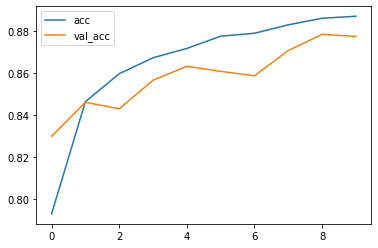

In [ ]:
pf_1[['acc','val_acc']].plot.line()

#CNN( Convolutional Neural Network )

##Builted model_2

###Load dataset & Split

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


In [ ]:
tf.random.set_seed(42)

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
y_train=tf.one_hot(y_train,depth=10)
y_test=tf.one_hot(y_test,depth=10)
y_train=tf.reshape(y_train,[-1,10])
y_test=tf.reshape(y_test,[-1,10])
print(y_train.shape ,"\n",y_test.shape )


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
(60000, 10) 
 (10000, 10)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


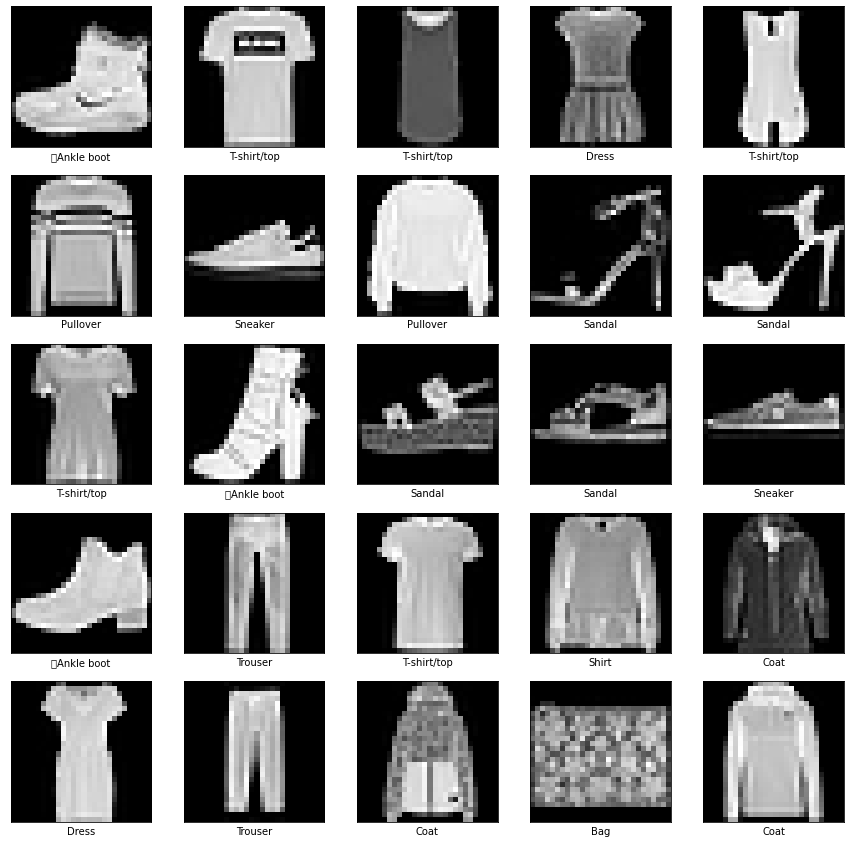

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', '	Ankle boot']

plt.figure(figsize=(15,15))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
  plt.xlabel(class_names[tf.argmax(y_train[i])])


plt.show()


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
print(x_train.shape ,"\n",x_test.shape )

(60000, 28, 28, 1) 
 (10000, 28, 28, 1)


In [ ]:
y_train=tf.reshape(y_train,[-1,10])
y_test=tf.reshape(y_test,[-1,10])
print(y_train.shape ,"\n",y_test.shape )

(60000, 10) 
 (10000, 10)


In [ ]:
print('x_train.shape:',x_train.shape,"\n",'x_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape,"\n",'y_test.shape:',y_test.shape)

x_train.shape: (60000, 28, 28, 1) 
 x_test.shape: (10000, 28, 28, 1)
y_train.shape: (60000, 10) 
 y_test.shape: (10000, 10)


In [ ]:
def images_pre_pro(images,labels):
    images=tf.image.random_flip_left_right(images)
    images=tf.image.random_flip_up_down(images)
    images=tf.image.random_brightness(images,0.1)
    images=tf.image.random_contrast(images,0.5,1.2)
    images=tf.image.rot90(images,k=tf.random.shuffle([1,2,3,4])[0])
    
    images=tf.clip_by_value(images,0,1)
    

    return images,labels

In [ ]:
def dataset_creater(x,y,training=False):
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(1028)
    if training:
        data=data.map(images_pre_pro,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    data=data.batch(32)
    data=data.prefetch(tf.data.experimental.AUTOTUNE)
    return data

In [ ]:
train_dataset=dataset_creater(x_train,y_train,training=True)
test_dataset=dataset_creater(x_test,y_test)

###Create model_2

In [ ]:
model_2=tf.keras.Sequential(
    [
     tf.keras.layers.Input([28, 28, 1]),
     tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',activation=tf.nn.relu),
     tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.nn.relu),
     tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation=tf.nn.relu),
     tf.keras.layers.MaxPooling2D((2,2)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation=tf.nn.relu),
     tf.keras.layers.Dense(10,activation=tf.nn.softmax),
     

    ]
)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model_2.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])

###Train & Predict & find accuracy



In [ ]:
model_2.fit(train_dataset,epochs=50,batch_size=32,validation_data=(test_dataset))

Epoch 1/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8265 - accuracy: 0.7146 - val_loss: 0.4261 - val_accuracy: 0.8528
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3820 - accuracy: 0.8649 - val_loss: 0.3678 - val_accuracy: 0.8747
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3209 - accuracy: 0.8846 - val_loss: 0.3009 - val_accuracy: 0.8939
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2834 - accuracy: 0.8979 - val_loss: 0.3061 - val_accuracy: 0.8946
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2573 - accuracy: 0.9077 - val_loss: 0.2877 - val_accuracy: 0.9014
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2481 - accuracy: 0.9087 - val_loss: 0.2598 - val_accuracy: 0.9084
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2276 - accuracy: 0.9173 - val_loss: 0.2879 - val_ac

In [ ]:
hist_info=model_2.history.history

In [ ]:
pf=pd.DataFrame(hist_info)
pf['accuracy'].mean()

0.9512253344058991

In [ ]:
pf['val_accuracy'].mean()

0.9087059998512268

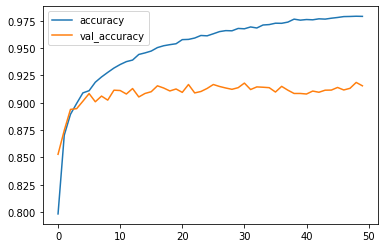

In [ ]:
pf[['accuracy','val_accuracy']].plot.line()